<a href="https://colab.research.google.com/github/StefanoSassy/Riesgo-y-portafolio/blob/main/Riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de riesgo y rendimiento de portafolio.

En este proyecto analizaremos, usando herramientas elementales de estadistica y finanzas, una base de datos e inversiones. Queremos calcular el rendimiento de las acciones y predecir el comportamiento futuro de este portafolio de inversión. La base de datos la descargaremos de Kaggle, específicamente: https://www.kaggle.com/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns?utm_source=chatgpt.com

Otro objetivo importante para la industria es la creación de gráficas interactivas. También nos efocaremos en presentar buenas gráficas para describir los datos.
Como siempre empezamos extrayendo los datos directamente de la fuente.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns")

print("Path to dataset files:", path)
#Este código nos lo da directamente la página de Kaggle en el boton "Download".

Path to dataset files: /kaggle/input/analyze-your-stock-portfolio-for-risks-and-returns


Creemos el data frame.

In [3]:
import os

carpeta = "/root/.cache/kagglehub/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns/versions/1"
print(os.listdir(carpeta))


['faang_stocks.csv']


In [4]:
import pandas as pd

ruta = "/root/.cache/kagglehub/datasets/abdelazizsami/analyze-your-stock-portfolio-for-risks-and-returns/versions/1/faang_stocks.csv"

# Cargar el dataset
df = pd.read_csv(ruta)

# Mostrar las primeras filas
print(df.head())


         Date   AAPL   AMZN  GOOGL    META    NFLX
0  2020-01-02  75.09  94.90  68.43  209.78  329.81
1  2020-01-03  74.36  93.75  68.08  208.67  325.90
2  2020-01-06  74.95  95.14  69.89  212.60  335.83
3  2020-01-07  74.60  95.34  69.76  213.06  330.75
4  2020-01-08  75.80  94.60  70.25  215.22  339.26


Ya descargada la base de datos necesitamos checar como siempre el tipo de datos y los valores nulos.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   AAPL    1006 non-null   float64
 2   AMZN    1006 non-null   float64
 3   GOOGL   1006 non-null   float64
 4   META    1006 non-null   float64
 5   NFLX    1006 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.3+ KB
None


Los únicos datos que nos puede llegar a molestar es la fecha, hay varias opciones, lo primero es convertir el dato a fecha, lo segundo es el formato de la fecha que mas se nos acomoda, muchas veces depende de la empresa que quiera hacer dicho annálisis.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Notesé que las fechas ahora son índices, esto es util para series temporales o comparar datos un rango de fechas.

In [7]:
print(df.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


## Análisis de Riesgo

Empecemos a gráficar, lo "divertido" de las siguientes gráficas es que son muy parecidas a las gráficas que vienen de las aplicaciones de la bolsa de valores.

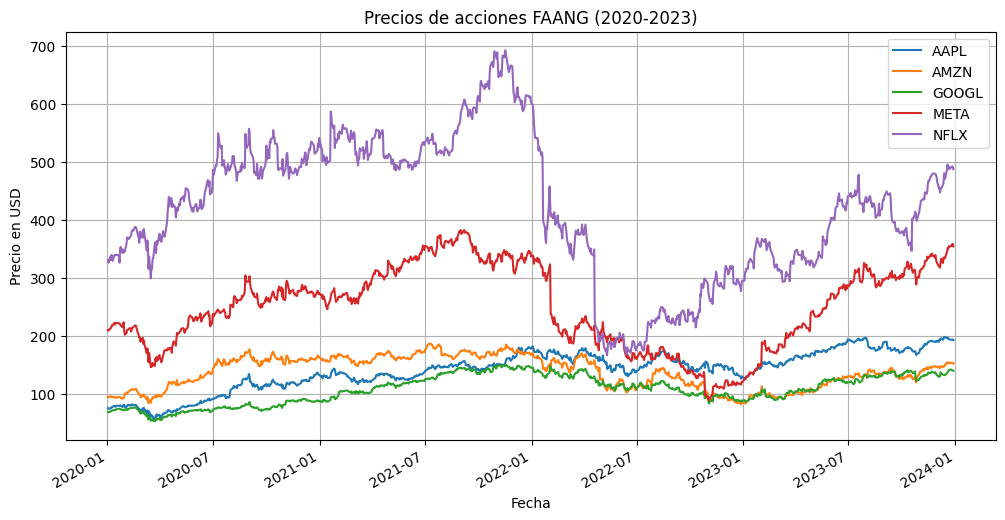

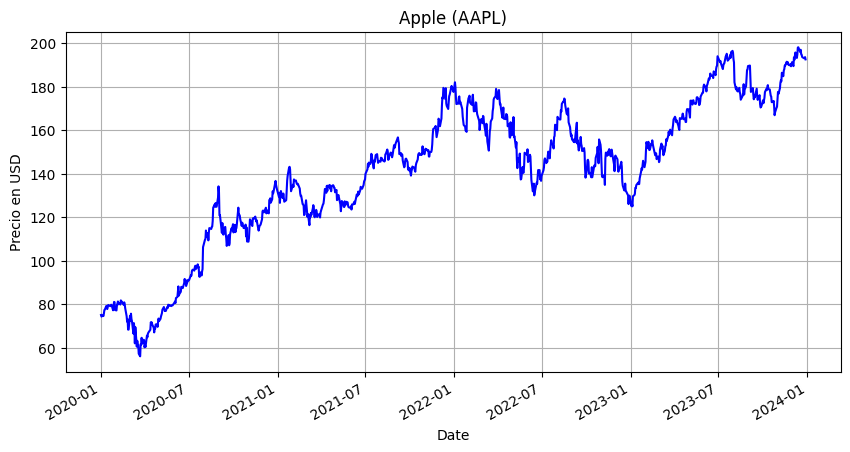

In [8]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 6), title='Precios de acciones FAANG (2020-2023)')
plt.ylabel('Precio en USD')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

df['AAPL'].plot(figsize=(10, 5), title='Apple (AAPL)', color='blue')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

Aveces queremos que la gráfica sea mas interactiva, veamos un ejemplo. Notesé como el cursor nos dara información diaria sobre el comportamiento de los datos. Otro de los objetivos es subir este proyecto a nuestro GitHub personal desde Colab, por eso necesitaremos instalar una nueva paquetería.

In [9]:
import plotly.express as px #Para gráficas interactivas
import plotly.io as pio # Para guardar gráficas interactivas
#from google.colab import files #Para descargar gráficas interactivas desde Colab


fig = px.line(df, title='Precios de acciones FAANG (interactivo)')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Precio en USD')
fig.show()

El siguiente ejemplo es preparar la gráfica para un dashboard o aplicación y poder interactuar con ella en una página web que vayamos a crear.

In [10]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
output_notebook()

p = figure(title="Acciones FAANG", x_axis_type='datetime', width=900, height=400)
colors = Category10[5]
for i, col in enumerate(df.columns):
    p.line(df.index, df[col], legend_label=col, color=colors[i])

p.legend.location = "top_left"
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Precio en USD'
show(p)

## Análisis estadistico con respecto del tiempo.

Si uno se encuentra con un proyecto de este estilo, refiriendome a que podemos hacer el análisis con respecto del tiempo, lo ideal es conseguir todos los valores que varian con respecto a los días, si los datos tiene "horas", dependiendo del proyecto y la necesidad, es recomendable hacer ambos análisis.

Emepcemos por los mas sencillos, el rendimiento promedio, la desviación estandar diaria (muy común en el análisis de riesgo) y un poco mas específico el rendimiento diario.

$$\text{Rendimiento diario}=\frac{\text{Precio en el dia actual - Precio en el dia anterior
}}{\text{Precio del dia anterior}}\times 100.$$

In [11]:
#Rendimientos diarios
df['AAPL_returns'] = df['AAPL'].pct_change()
df['AMZN_returns'] = df['AMZN'].pct_change()
df['GOOGL_returns'] = df['GOOGL'].pct_change()
df['META_returns'] = df['META'].pct_change()
df['NFLX_returns'] = df['NFLX'].pct_change()

#Graficamos los rendimientos diarios
import plotly.graph_objects as go

fig = go.Figure()

# Lista de empresas y colores opcionales
empresas = ['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']
for empresa in empresas:
    fig.add_trace(go.Scatter(x=df.index, y=df[empresa], mode='lines', name=empresa))

fig.update_layout(
    title="Rendimientos diarios de acciones FAANG (interactivo)",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento diario",
    hovermode="x unified",
    template="plotly_white",
    height=600
)

fig.show()
#Notemos que la gráfica es bastante "interactiva" pues nos permite seleccionar que color o colores queremos observar.

Veamos la desviaciones estadar gráficamente.

In [12]:
stds = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].std()

for col, std in stds.items():
    print(f"{col}: {std:.4f}")

stds_df = stds.reset_index()
stds_df.columns = ['Empresa', 'Desviación Estándar']

fig = px.bar(
    stds_df,
    x='Empresa',
    y='Desviación Estándar',
    title='Volatilidad de rendimientos diarios (Desviación estándar)',
    text='Desviación Estándar',
    template='plotly_white'
)
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.show()

AAPL_returns: 0.0211
AMZN_returns: 0.0237
GOOGL_returns: 0.0211
META_returns: 0.0295
NFLX_returns: 0.0307


Para ser todavía mas interactivos cons las gráficas podemos incluir la media vs la desviación estandar. Usamos una media móvil (rolling mean) y desviación estándar móvil para que se actualicen con el tiempo

In [13]:
avg_returns = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].mean()

for col, avg in avg_returns.items():
    print(f"{col}: {avg:.4f}")

AAPL_returns: 0.0012
AMZN_returns: 0.0007
GOOGL_returns: 0.0009
META_returns: 0.0010
NFLX_returns: 0.0009


In [14]:
window = 30  # número de días para calcular las bandas
df['AAPL_mean'] = df['AAPL_returns'].rolling(window).mean()
df['AAPL_std'] = df['AAPL_returns'].rolling(window).std()

df['AAPL_upper'] = df['AAPL_mean'] + df['AAPL_std']
df['AAPL_lower'] = df['AAPL_mean'] - df['AAPL_std']

In [15]:
fig = go.Figure()

# Línea del rendimiento diario
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_returns'],
    mode='lines', name='Rendimiento diario',
    line=dict(color='lightskyblue')
))

# Media móvil
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_mean'],
    mode='lines', name='Media (30 días)',
    line=dict(color='green')
))

# Banda superior
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_upper'],
    mode='lines', name='+1 Desv. Estándar',
    line=dict(color='lightgray'),
    showlegend=False
))

# Banda inferior
fig.add_trace(go.Scatter(
    x=df.index, y=df['AAPL_lower'],
    mode='lines', name='-1 Desv. Estándar',
    line=dict(color='lightgray'),
    fill='tonexty',  # relleno entre las bandas
    fillcolor='rgba(173,216,230,0.2)',  # azul claro semi-transparente
    showlegend=False
))

fig.update_layout(
    title='Rendimiento Diario de AAPL con Bandas ±1 Desv. Estándar',
    xaxis_title='Fecha',
    yaxis_title='Rendimiento Diario',
    template='plotly_white'
)

fig.show()

In [16]:
import numpy as np
stocks = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']
fig = go.Figure()
fig.add_trace(go.Scatter(x=stocks, y=avg_returns, mode='lines+markers', name='Retorno prom'))
fig.add_trace(go.Scatter(x=stocks, y=stds, mode='lines+markers', name='Desviación est'))

fig.update_layout(title='Retorno promedio vs. Desviación estándar por Acción',
                  xaxis_title='Acción', yaxis_title='Valor', legend_title='Metricas')
fig.show()

# Normalizar las desviaciones estándar entre 0 y 1
min_std, max_std = min(stds), max(stds)
normalized_stds = [(std - min_std) / (max_std - min_std) for std in stds]

# Aplicar una transformación exponencial para ampliar diferencias
scaled_stds = [np.exp(std) for std in normalized_stds]  # Ajusta el factor si es necesario

fig = px.scatter(x=stocks, y=avg_returns, size=scaled_stds, title='Retorno promedio vs. Desviación estándar por Acción',
                 labels={'x': 'Acción', 'y': 'Retorno prom'}, hover_name=stocks)
fig.show()


¿Qué están mostrando las gráficas? La primera simplemente esta gráficando el promedio de los rendimientos diarios contra la desviación estandar de los rendimientos diarios. En la segunda gráfica se hicieron mas operación, es claro que en el eje $x$ están las acciones, en el $y$ está el promedio y el tamaño de los puntos representa la desviación, pero como las desviaciones de las acciones no están muy diferenciadas entre sí, las normalizamos y aplicamos una función exponencial para que la diferencia del tamaño sea mas notorio. Cuidado con este manejo, hay que tenerlo encuenta antes de compartir o presentar el análisis de los datos.   

## Algunas conclusiones

**Análisis de Volatilidad**

La desviación estándar nos indica qué tan dispersos están los rendimientos diarios alrededor del promedio. Las acciones con mayor desviación estándar tienen más variabilidad en sus rendimientos, lo que sugiere un mayor riesgo.
*  Acción más volátil: NFLX (0.0307), seguida de META (0.0295). Esto implica
   que sus rendimientos fluctúan más, lo que puede significar oportunidades de alto retorno, pero también mayor riesgo.
*  Acción menos volátil: AAPL y GOOGL (0.0211), lo que sugiere mayor
   estabilidad en los rendimientos.
*  Rangos cercanos: Las desviaciones estándar están relativamente cerca unas  
   de otras, lo que significa que, aunque algunas empresas sean más volátiles, la diferencia no es extrema.

**Relación con los Retornos Promedio**

* Los retornos promedio de todas las acciones son bajos, lo que indica que,
  aunque haya fluctuaciones diarias, el rendimiento neto tiende a ser estable y pequeño.

* NFLX y META, con mayor volatilidad, no muestran un rendimiento
  significativamente mayor, lo que sugiere que su riesgo podría no estar compensado por un retorno proporcionalmente más alto.


## **Distribuciones**

In [17]:
from scipy.stats import gaussian_kde

returns_data = {
    "AAPL": df["AAPL_returns"].dropna(),
    "AMZN": df["AMZN_returns"].dropna(),
    "GOOGL": df["GOOGL_returns"].dropna(),
    "META": df["META_returns"].dropna(),
    "NFLX": df["NFLX_returns"].dropna()
}

fig = go.Figure()

# Generar la KDE corregida para cada acción
for stock, data in returns_data.items():
    if len(data) > 1:  # Evita errores si la serie es demasiado corta
        kde = gaussian_kde(data)  # Modelo KDE
        kde_x = np.linspace(min(data), max(data), 100)  # Rango de valores
        kde_y = kde(kde_x)  # Densidad estimada

        fig.add_trace(go.Scatter(x=kde_x, y=kde_y, mode='lines', name=stock))

# Configuración del gráfico
fig.update_layout(title="Distribución KDE de los Retornos Diarios (Interactiva)",
                  xaxis_title="Retorno Diario",
                  yaxis_title="Densidad",
                  legend_title="Acciones",
                  hovermode="x unified")

fig.show()

Las "campanas" nos permiten ver cómo se distribuyen los datos y qué tan concentrados o dispersos están los rendimientos diarios. Si alguna acción tiene una curva más ancha, significa mayor variabilidad en sus retornos, mientras que las más estrechas indican estabilidad.

## **Correlación**

Finalmente, veamos si hay correlación de la primer gráfica (Precios de las acciones), podemos observar que sí habrá correlación, pues muchas las acciones se comportan parecido, algunas crecen mas que otras, pero se observa que crecen y decrecen al mismo tiempo.

               AAPL_returns  AMZN_returns  GOOGL_returns  META_returns  \
AAPL_returns       1.000000      0.623860       0.690990      0.607307   
AMZN_returns       0.623860      1.000000       0.664295      0.613075   
GOOGL_returns      0.690990      0.664295       1.000000      0.681972   
META_returns       0.607307      0.613075       0.681972      1.000000   
NFLX_returns       0.475899      0.555095       0.467006      0.513583   

               NFLX_returns  
AAPL_returns       0.475899  
AMZN_returns       0.555095  
GOOGL_returns      0.467006  
META_returns       0.513583  
NFLX_returns       1.000000  


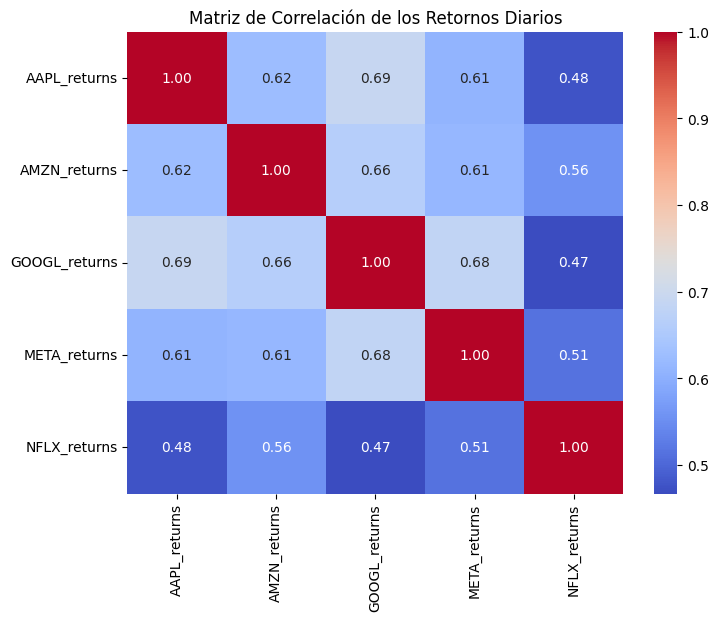

In [18]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].corr()
print(correlation_matrix)
# Crear la figura
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de los Retornos Diarios")
plt.show()

🔹 **Análisis de Correlación**

1. Alta correlación positiva ($\geq$ 0.60)

 * AAPL, AMZN, GOOGL y META tienen correlaciones bastante altas entre sí (~0.
   60-0.70). Esto sugiere que sus movimientos suelen estar alineados, probablemente debido a factores macroeconómicos y su participación en el sector tecnológico.

 * La relación más fuerte es entre AAPL-GOOGL (0.69) y GOOGL-META (0.68), lo    que indica que estas dos empresas tienen dinámicas de precio muy similares.

2. Correlación moderada (~0.50)

 * NFLX muestra menor correlación con las demás (entre ~0.47 y ~0.55). Esto significa que sus movimientos no siempre siguen la misma tendencia que el resto de las empresas tecnológicas.

 * La menor correlación es entre GOOGL-NFLX (0.46), lo que sugiere que Netflix tiene un comportamiento de mercado más independiente.

3. Conclusión

 * Las empresas tecnológicas (AAPL, AMZN, GOOGL, META) están altamente correlacionadas, lo que significa que eventos que afectan una pueden impactar a las demás.

 * NFLX es la acción con menor correlación, lo que puede indicar que sigue factores distintos (por ejemplo, consumo de entretenimiento y producción de contenido).

## **Correlación Movil**

La correlación móvil nos permite ver cómo cambian las relaciones entre las acciones a lo largo del tiempo. Esto es útil para detectar períodos en los que ciertas empresas se vuelven más o menos dependientes entre sí.

🔹 ¿Qué hace este análisis?
* Usa .rolling(30).corr() para calcular la correlación entre acciones en
  ventanas de 30 días.

* Extrae la relación AAPL-AMZN como ejemplo, pero puedes aplicar esto a
  cualquier par de activos.

* Grafica cómo varía la correlación a lo largo del tiempo, permitiendo
  visualizar periodos de mayor o menor dependencia.

In [19]:

# Calcular la correlación móvil con una ventana de 30 días
rolling_corr = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].rolling(30).corr()

# Crear la figura interactiva
fig = go.Figure()

# Agregar la correlación móvil de cada par con AAPL
for stock in ['AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']:
    rolling_corr_stock = rolling_corr.xs(stock, level=1)[['AAPL_returns']]

    fig.add_trace(go.Scatter(x=rolling_corr_stock.index, y=rolling_corr_stock['AAPL_returns'],
                             mode='lines', name=f"AAPL vs {stock.replace('_returns', '')}"))

# Configurar la gráfica interactiva
fig.update_layout(title="Correlación Móvil (30 días) de AAPL con otras acciones",
                  xaxis_title="Fecha",
                  yaxis_title="Correlación",
                  legend_title="Comparación con AAPL",
                  hovermode="x unified")

fig.show()

Esperamos que para este momento, además de ver muchos ejemplos de como hacer un análisis de riesgo "básico", estemos mejor familiarizados con las gráficas que muestran muchas aplicaciones de "bolsa" o algunos artículos tanto científicos como económicos. Aunque las cuentas no son complicadas, las interpretaciones de las gráficas aveces pueden pasarnos por complicadas o en su contraparte obvias.

## Análisis del Portafolio

El análisis de portafolio es el siguiente paso lógico después de evaluar el riesgo de cada activo individualmente. En un análisis de portafolio, simulas una inversión en distintas acciones y evalúas cómo habría sido su rendimiento y riesgo. Esto te ayuda a tomar decisiones más informadas antes de invertir dinero real. Aademaás, podemos aplicar conceptos como diversificación, optimización de rendimiento y control de riesgo para construir un portafolio eficiente.

Para analizar un portafolio, podemos enfocarnos en: **composición del portafolio: Pesos de cada activo en la cartera**.

Para comenzar, asignamos pesos iguales a cada uno de los cinco activos, lo que significa que cada acción representa el 20% del total invertido:


In [20]:
weights = np.ones(len(stocks)) / len(stocks)
print(weights)

[0.2 0.2 0.2 0.2 0.2]


Una vez definidos los pesos de inversión en cada activo, podemos calcular el retorno esperado del portafolio como la suma ponderada de los rendimientos promedio diarios de cada acción:
$$\text{Retorno esperado del portafolio}=w^t\cdot r.$$
Donde $w$ es el vector de pesos, y $r$ el vector de rendimientos promedio.

In [28]:
# Retornos promedio dados anteriormente
avg_returns = np.array(avg_returns)

# Pesos del portafolio
weights = np.array(weights)

# Retorno esperado del portafolio
portfolio_return = np.dot(weights, avg_returns)

print(f"Retorno esperado del portafolio: {portfolio_return:.4f}")

Retorno esperado del portafolio: 0.0009


In [22]:
# Obtener matriz de covarianza de los retornos diarios
cov_matrix = df[['AAPL_returns', 'AMZN_returns', 'GOOGL_returns', 'META_returns', 'NFLX_returns']].cov()

# Cálculo de la volatilidad del portafolio (desviación estándar)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
print(f"Volatilidad del portafolio: {portfolio_volatility:.4f}")

Volatilidad del portafolio: 0.0206


In [23]:
risk_free_rate = 0.0001  # Supongamos una tasa libre de riesgo del 0.01% diario
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"Ratio de Sharpe: {sharpe_ratio:.4f}")

Ratio de Sharpe: 0.0408


Esto indica que, por cada unidad de riesgo que estás asumiendo, obtienes una ganancia esperada neta muy baja, lo cual es común en análisis diarios —los retornos diarios suelen ser pequeños. Aun así, este ratio te permite comparar portafolios entre sí de forma justa.

In [24]:
import scipy.optimize as sco
num_assets = len(avg_returns)

# Función de minimización de riesgo para un retorno objetivo
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Restricciones: La suma de los pesos debe ser 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Límites para los pesos (entre 0 y 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimización de portafolio
initial_guess = num_assets * [1. / num_assets]  # Pesos iniciales iguales
opt_result = sco.minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Pesos óptimos
optimal_weights = opt_result.x
print("Pesos óptimos del portafolio:", optimal_weights)

Pesos óptimos del portafolio: [0.39855884 0.19003736 0.36893403 0.         0.04246977]


In [25]:
# Calcular nuevo retorno esperado
optimized_return = np.dot(optimal_weights, avg_returns)

# Calcular nueva volatilidad del portafolio
optimized_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

# Calcular nuevo Ratio de Sharpe
optimized_sharpe = (optimized_return - risk_free_rate) / optimized_volatility

print(f"Nuevo Retorno esperado: {optimized_return:.4f}")
print(f"Nueva Volatilidad del portafolio: {optimized_volatility:.4f}")
print(f"Nuevo Ratio de Sharpe: {optimized_sharpe:.4f}")

Nuevo Retorno esperado: 0.0010
Nueva Volatilidad del portafolio: 0.0191
Nuevo Ratio de Sharpe: 0.0461
